In [75]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import parser
from pandas.tseries.offsets import BDay

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [11]:
datetime(year=2015, month=7, day=4, hour = 23, minute = 5)

datetime.datetime(2015, 7, 4, 23, 5)

In [22]:
date = parser.parse("4th July, 2015")
#date = parser.parse("2015 July 4th")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [23]:
date.strftime('%A')

'Saturday'

In [29]:
# YYYY-MM-DD
date = np.array('2015-12-04', dtype=np.datetime64)
date

array('2015-12-04', dtype='datetime64[D]')

In [30]:
date + np.arange(12)

array(['2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
       '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
       '2015-12-12', '2015-12-13', '2015-12-14', '2015-12-15'],
      dtype='datetime64[D]')

In [35]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

<img src="numpy_datetime_code.png">

In [36]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [37]:
date.strftime('%A')

'Saturday'

In [38]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

# pandas time series

In [39]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [40]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [41]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

In [48]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20160708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2016-07-08'],
              dtype='datetime64[ns]', freq=None)

In [49]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2016-07-08'],
            dtype='period[D]', freq='D')

In [50]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '371 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: pd.date_range()

In [51]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range('2015-07-03', periods=9)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range('2015-07-03', periods=8, freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [58]:
pd.timedelta_range(0, periods=26, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00',
                '0 days 12:00:00', '0 days 13:00:00', '0 days 14:00:00',
                '0 days 15:00:00', '0 days 16:00:00', '0 days 17:00:00',
                '0 days 18:00:00', '0 days 19:00:00', '0 days 20:00:00',
                '0 days 21:00:00', '0 days 22:00:00', '0 days 23:00:00',
                '1 days 00:00:00', '1 days 01:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

<img src="Freq_offset.png">

In [59]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [61]:
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Resampling, Shifting, and Windowing

In [86]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [87]:
goog = goog['Close']
goog

Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-23     54.495735
2004-08-24     52.239193
2004-08-25     52.802086
                 ...    
2015-12-24    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Name: Close, Length: 2863, dtype: float64

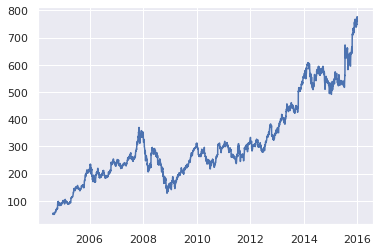

In [88]:
plt.plot(goog)

### Resampling and converting frequencies

/home/david/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/david/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/david/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


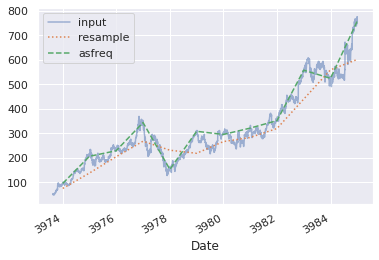

In [92]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

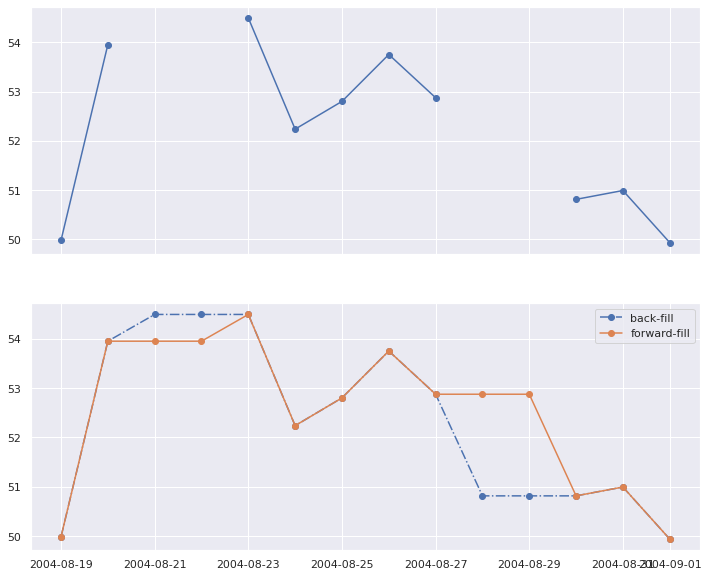

In [106]:
fig, ax = plt.subplots(2, figsize=(12,10),sharex=True)
data = goog.iloc[:10]

ax[0].plot(data.asfreq('D'), marker='o')

ax[1].plot(data.asfreq('D', method='bfill'), linestyle='dashdot',marker='o')
ax[1].plot(data.asfreq('D', method='ffill'), marker='o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time shifts

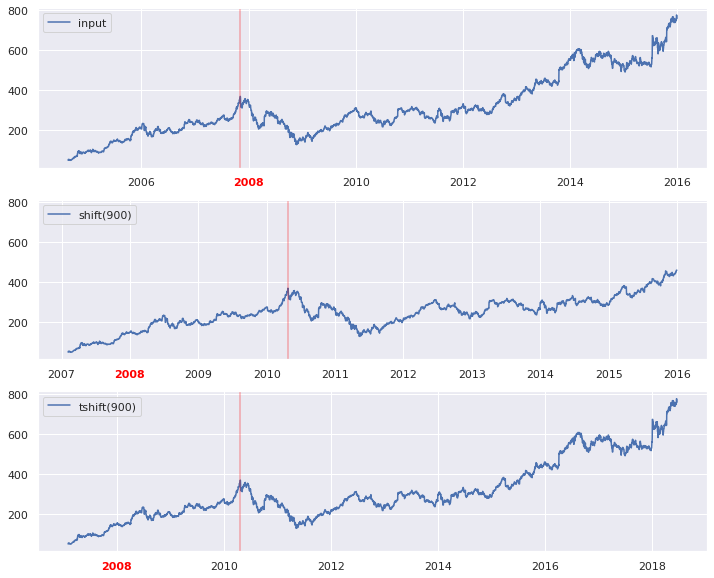

In [109]:
fig, ax = plt.subplots(3, figsize=(12,10),sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

ax[0].plot(goog)
ax[1].plot(goog.shift(900))
ax[2].plot(goog.tshift(900))

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

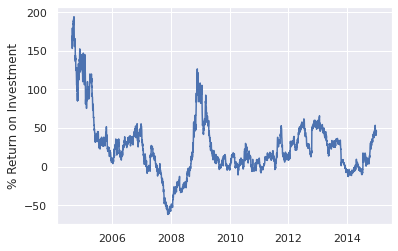

In [110]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
plt.plot(ROI)
plt.ylabel('% Return on Investment');

## Rolling windows

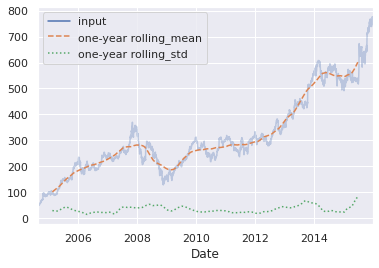

In [117]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [116]:
rolling.mean()

nan